In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import spacy
from collections import Counter
from string import punctuation
from matplotlib import rcParams
%matplotlib inline
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [2]:
messages = pd.read_json('microsoft.json')
messages

,Article,Date,Contributor,Role
0,"3 ways to enhance your cloud journey: break, p...","Posted on November 3, 2021",Omar Khan,"General Manager, Microsoft Azure"
1,Transform your business with Microsoft's unriv...,"Posted on November 2, 2021",Rohan Kumar,"Corporate Vice President, Azure Data"
2,Innovate with cloud-native apps and open sourc...,"Posted on November 2, 2021",Brendan Burns,"Corporate Vice President, Azure Compute"
3,"Your hybrid, multicloud, and edge strategy jus...","Posted on November 2, 2021",Kathleen Mitford,"Corporate Vice President, Azure Marketing"
4,Key foundations for protecting your data with ...,"Posted on November 2, 2021",Mark Russinovich,"Chief Technology Officer and Technical Fellow,..."
...,...,...,...,...
6031,"Why customers, including SAP, choose Azure for...","Posted on June 9, 2021",Talal Alqinawi,"Senior Director, Azure Marketing"
6032,5 reasons to attend the Azure Hybrid and Multi...,"Posted on June 9, 2021",Guillermo Gomez,Senior Product Marketing Manager
6033,Expanding cloud services: Microsoft launches i...,"Posted on June 15, 2021",Noelle Walsh,"Corporate Vice President, Cloud Operations + I..."
6034,"Unlocking the enterprise opportunity with 5G, ...","Posted on June 16, 2021",Tad Brockway,"Corporate Vice President, Microsoft Azure for ..."


In [3]:
nlp = spacy.load("en_core_web_sm")

In [4]:
def get_hotwords(text):
    result = []
    pos_tag = ['PROPN', 'ADJ', 'NOUN']
    doc = nlp(text.lower())
    for token in doc:
        
        if(token.text in nlp.Defaults.stop_words or token.text in punctuation):
            continue
        
        elif(token.pos_ in pos_tag):
            result.append(token.text)
                
    return result

In [5]:
message_text = str(messages.Article.values)
output = get_hotwords(message_text)
words = [x for x in Counter(output).most_common(30)]

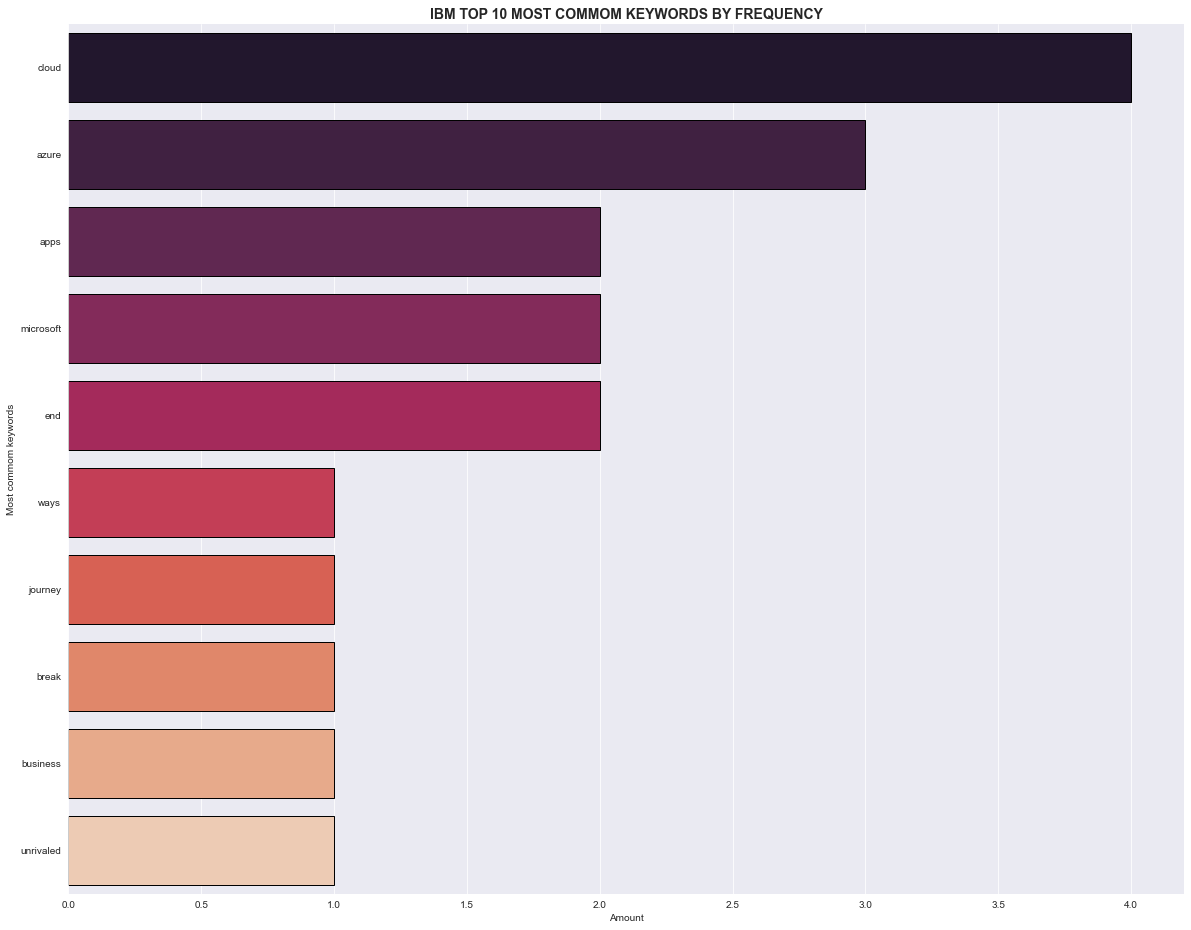

In [6]:
df = pd.DataFrame(words, columns =['Most commom keywords', 'Amount'])
rcParams['figure.figsize'] = 20,16
sns.set_style('darkgrid')
ax = sns.barplot(x='Amount', y='Most commom keywords', data= df[:10], palette='rocket', edgecolor='k')
ax.set_title('IBM TOP 10 MOST COMMOM KEYWORDS BY FREQUENCY', fontsize=14, weight='bold')
ax.set_xlabel('Amount')
sns.despine();
plt.savefig('ibm_keywords.png')